In [1]:
# [Vector Data I/O in Python — AutoGIS site documentation](https://automating-gis-processes.github.io/site/notebooks/L2/data_io.html)
# https://automating-gis-processes.github.io/site/notebooks/L2/data_io.html

In [2]:
import fiona
from fiona._drivers import GDALEnv
env = GDALEnv()

# this will pring all available Driers supported by GDAL
# all these can be used for reading data from them
# and most often also writing data into

env.start().drivers().keys()

dict_keys(['PCIDSK', 'netCDF', 'PDS4', 'JP2OpenJPEG', 'PDF', 'MBTiles', 'EEDA', 'ESRI Shapefile', 'MapInfo File', 'UK .NTF', 'OGR_SDTS', 'S57', 'DGN', 'OGR_VRT', 'REC', 'Memory', 'BNA', 'CSV', 'NAS', 'GML', 'GPX', 'LIBKML', 'KML', 'GeoJSON', 'GeoJSONSeq', 'ESRIJSON', 'TopoJSON', 'Interlis 1', 'Interlis 2', 'OGR_GMT', 'GPKG', 'SQLite', 'OGR_DODS', 'WAsP', 'PostgreSQL', 'OpenFileGDB', 'XPlane', 'DXF', 'CAD', 'Geoconcept', 'GeoRSS', 'GPSTrackMaker', 'VFK', 'PGDUMP', 'OSM', 'GPSBabel', 'SUA', 'OpenAir', 'OGR_PDS', 'WFS', 'WFS3', 'HTF', 'AeronavFAA', 'EDIGEO', 'GFT', 'SVG', 'CouchDB', 'Cloudant', 'Idrisi', 'ARCGEN', 'SEGUKOOA', 'SEGY', 'XLS', 'ODS', 'XLSX', 'ElasticSearch', 'Carto', 'AmigoCloud', 'SXF', 'Selafin', 'JML', 'PLSCENES', 'CSW', 'VDV', 'GMLAS', 'MVT', 'TIGER', 'AVCBin', 'AVCE00', 'NGW', 'HTTP'])

In [3]:
# available drivers in geopandas/fiona. same as: fiona.supported_drivers
import geopandas as gpd
gpd.io.file.fiona.drvsupport.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

In [4]:
import geopandas as gpd

In [5]:
import os

# define path to folder
input_folder = r"data/L2_data/NLS/2018/L4/L41/L4132R.shp"

# join folder path and filename
fp = os.path.join(input_folder, "m_L4132R_p.shp")

print(fp)

data/L2_data/NLS/2018/L4/L41/L4132R.shp/m_L4132R_p.shp


In [6]:
data = gpd.read_file(fp)

In [7]:
data.head(5)

,TEKSTI,RYHMA,LUOKKA,TASTAR,KORTAR,KORARV,KULKUTAPA,KOHDEOSO,AINLAHDE,SYNTYHETKI,...,KARTOGLK,ALUEJAKOON,VERSUH,SUUNTA,SIIRT_DX,SIIRT_DY,KORKEUS,ATTR2,ATTR3,geometry
0,None,64,32421,5000,0,0.0,0,1812247077,1,20180125,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,None,64,32421,5000,0,0.0,0,1718796908,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,None,64,32421,20000,0,0.0,0,411167695,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,None,64,32421,20000,0,0.0,0,411173768,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,None,64,32421,20000,0,0.0,0,411173698,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


In [8]:
data.columns

Index(['TEKSTI', 'RYHMA', 'LUOKKA', 'TASTAR', 'KORTAR', 'KORARV', 'KULKUTAPA',
       'KOHDEOSO', 'AINLAHDE', 'SYNTYHETKI', 'KUOLHETKI', 'KARTOGLK',
       'ALUEJAKOON', 'VERSUH', 'SUUNTA', 'SIIRT_DX', 'SIIRT_DY', 'KORKEUS',
       'ATTR2', 'ATTR3', 'geometry'],
      dtype='object')

In [9]:
# below, in my case, original code don't use .copy() method, but in that way I met SettingWithCopyWarning
# data2 = data[['RYHMA', 'LUOKKA', 'geometry']]

# so I added .copy() and used another variable "data2"
data2 = data[['RYHMA', 'LUOKKA', 'geometry']].copy()

In [10]:
data2.head(5)

,RYHMA,LUOKKA,geometry
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


In [11]:
data2.columns

Index(['RYHMA', 'LUOKKA', 'geometry'], dtype='object')

In [12]:
colnames = {'RYHMA':'GROUP', 'LUOKKA':'CLASS'}
data2.rename(columns=colnames, inplace=True)

In [13]:
data2

,GROUP,CLASS,geometry
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6..."
...,...,...,...
4306,64,36313,"POLYGON ((375668.607 6682942.062, 375671.489 6..."
4307,64,36313,"POLYGON ((368411.063 6679328.990, 368411.424 6..."
4308,64,36313,"POLYGON ((368054.608 6679164.737, 368059.602 6..."
4309,64,36313,"POLYGON ((368096.331 6678000.000, 368090.276 6..."


In [15]:
print("Number of rows", len(data2['CLASS']))
print("Number of classes", data2['CLASS'].nunique())
print("Number of groups", data2['GROUP'].nunique())

Number of rows 4311
Number of classes 20
Number of groups 1


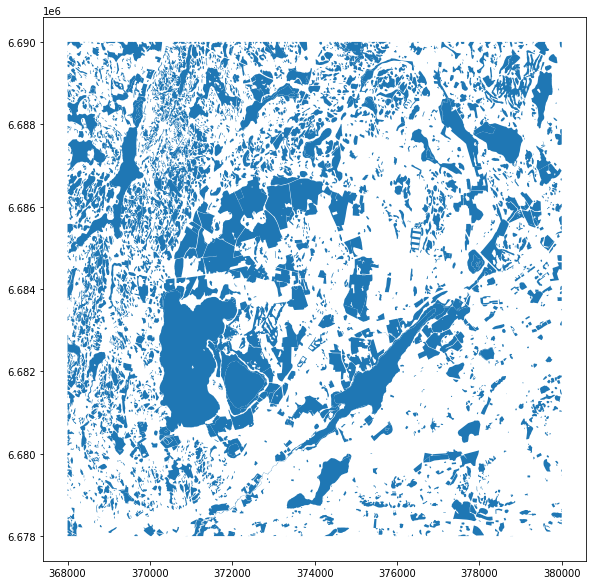

In [19]:
%matplotlib inline
data.plot(figsize=(10,10))

In [21]:
print(data2['geometry'].head())

0    POLYGON ((379394.248 6689991.936, 379389.790 6...
1    POLYGON ((378980.811 6689359.377, 378983.401 6...
2    POLYGON ((378804.766 6689256.471, 378817.107 6...
3    POLYGON ((379229.695 6685025.111, 379233.366 6...
4    POLYGON ((379825.199 6685096.247, 379829.651 6...
Name: geometry, dtype: geometry


In [33]:
data2['geometry']

0       POLYGON ((379394.248 6689991.936, 379389.790 6...
1       POLYGON ((378980.811 6689359.377, 378983.401 6...
2       POLYGON ((378804.766 6689256.471, 378817.107 6...
3       POLYGON ((379229.695 6685025.111, 379233.366 6...
4       POLYGON ((379825.199 6685096.247, 379829.651 6...
                              ...                        
4306    POLYGON ((375668.607 6682942.062, 375671.489 6...
4307    POLYGON ((368411.063 6679328.990, 368411.424 6...
4308    POLYGON ((368054.608 6679164.737, 368059.602 6...
4309    POLYGON ((368096.331 6678000.000, 368090.276 6...
4310    POLYGON ((368000.666 6678460.142, 368000.000 6...
Name: geometry, Length: 4311, dtype: geometry

In [23]:
# iterate over rows and print the area of a Polygon
for index, row in data2[0:5].iterrows():
    # get the area from the shapely-object stored in the geometry-column
    poly_area = row['geometry'].area
    
    # print info
    print("Polygon area at index {index} is: {area:.2f} m^2".format(index=index, area=poly_area))

Polygon area at index 0 is: 76.03 m^2
Polygon area at index 1 is: 2652.05 m^2
Polygon area at index 2 is: 3185.65 m^2
Polygon area at index 3 is: 13075.17 m^2
Polygon area at index 4 is: 3980.68 m^2


In [35]:
data.area.head()

0       76.027392
1     2652.054186
2     3185.649995
3    13075.165279
4     3980.682621
dtype: float64

In [38]:
# create a new column called 'area' and assign the area of the Polygons into it
data2['area'] = data2.area
data2.head()

,GROUP,CLASS,geometry,area
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6...",76.027392
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6...",2652.054186
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6...",3185.649995
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6...",13075.165279
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6...",3980.682621


In [40]:
max_area = data2['area'].max()
min_area = data2['area'].min()
mean_area = data2['area'].mean()

In [41]:
print(max_area)
print(min_area)
print(mean_area)

4084558.1461314526
0.6726829999670927
11522.29387471724


In [45]:
# select a class
selection = data2.loc[data2["CLASS"]==36200]
selection.head()

,GROUP,CLASS,geometry,area
4247,64,36200,"POLYGON ((379089.473 6687069.722, 379093.838 6...",1318.878221
4248,64,36200,"POLYGON ((376732.156 6687178.141, 376731.301 6...",22918.867073
4249,64,36200,"POLYGON ((377939.741 6684539.678, 377929.192 6...",5759.318345
4250,64,36200,"POLYGON ((372948.857 6688594.047, 372935.951 6...",265899.648379
4251,64,36200,"POLYGON ((370900.963 6689201.649, 370890.077 6...",128221.314258


In [51]:
selection['area'].min()

148.14699949888129

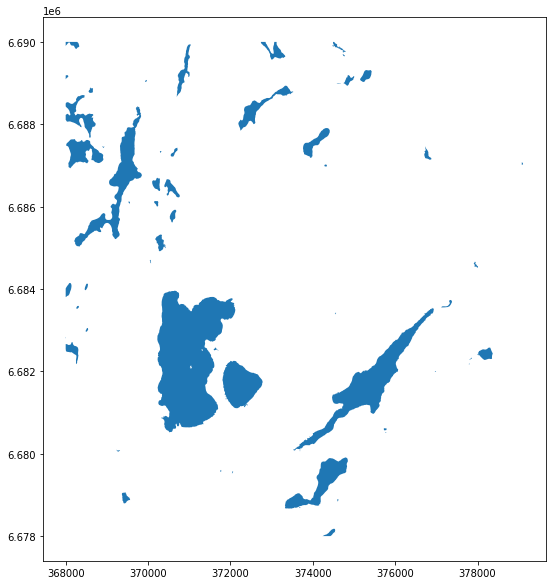

In [54]:
selection.plot(figsize=(10,10))

In [57]:
# create a output path for the data
output_folder = r"data/L2_data/"
output_fp = os.path.join(output_folder, "Class_36200.shp")
selection.to_file(output_fp)

In [58]:
print(data2['CLASS'].unique())

[32421 32200 34300 34100 34700 32500 32112 32111 32611 32612 32800 32900
 35300 35412 35411 35421 33000 33100 36200 36313]


In [61]:
# group the data by class
grouped = data2.groupby('CLASS')

# Let's see what we have
grouped.groups.keys()

dict_keys([32111, 32112, 32200, 32421, 32500, 32611, 32612, 32800, 32900, 33000, 33100, 34100, 34300, 34700, 35300, 35411, 35412, 35421, 36200, 36313])

In [62]:
# iterate over the group object
for key, group in grouped:
    # let's check how many rows each group has:
    print('Terrain class:', key)
    print('Number of rows:', len(group), "\n")

Terrain class: 32111
Number of rows: 1 

Terrain class: 32112
Number of rows: 1 

Terrain class: 32200
Number of rows: 2 

Terrain class: 32421
Number of rows: 110 

Terrain class: 32500
Number of rows: 2 

Terrain class: 32611
Number of rows: 257 

Terrain class: 32612
Number of rows: 11 

Terrain class: 32800
Number of rows: 80 

Terrain class: 32900
Number of rows: 28 

Terrain class: 33000
Number of rows: 5 

Terrain class: 33100
Number of rows: 118 

Terrain class: 34100
Number of rows: 3005 

Terrain class: 34300
Number of rows: 1 

Terrain class: 34700
Number of rows: 3 

Terrain class: 35300
Number of rows: 134 

Terrain class: 35411
Number of rows: 35 

Terrain class: 35412
Number of rows: 449 

Terrain class: 35421
Number of rows: 5 

Terrain class: 36200
Number of rows: 56 

Terrain class: 36313
Number of rows: 8 



In [63]:
# saving multiple output files
basename = "terrain"
key = 36200

# option1. concatenating using the '+' operator:
out_fp = basename + "_" + str(key) + ".shp"

# option2. positional formatting using '%' operator:
out_fp = "%s_%s.shp" %(basename, key)

# option3. positional formatting using `.format()`
out_fp = "{}_{}.shp".format(basename, key)

In [65]:
# determine outpu directory
output_folder = r"data/L2_data/"

# create a new folder called 'Results'
result_folder = os.path.join(output_folder, 'Results')

# Check if the folder exist already
if not os.path.exists(result_folder):
    os.makedirs(result_folder)

In [66]:
# iterate over the groups
for key, group in grouped:
    # format the filename
    output_name = "terrain_%s.shp" % str(key)
    
    # print information about the process
    print("Saving file", os.path.basename(output_name))
    
    # create an output path
    outpath = os.path.join(result_folder, output_name)
    
    # export the data
    group.to_file(outpath)

Saving file terrain_32111.shp
Saving file terrain_32112.shp
Saving file terrain_32200.shp
Saving file terrain_32421.shp
Saving file terrain_32500.shp
Saving file terrain_32611.shp
Saving file terrain_32612.shp
Saving file terrain_32800.shp
Saving file terrain_32900.shp
Saving file terrain_33000.shp
Saving file terrain_33100.shp
Saving file terrain_34100.shp
Saving file terrain_34300.shp
Saving file terrain_34700.shp
Saving file terrain_35300.shp
Saving file terrain_35411.shp
Saving file terrain_35412.shp
Saving file terrain_35421.shp
Saving file terrain_36200.shp
Saving file terrain_36313.shp


In [67]:
area_info = grouped.area.sum().round()
area_info

CLASS
32111        1834.0
32112        2148.0
32200      105737.0
32421      702073.0
32500      109747.0
32611    13135597.0
32612      107343.0
32800     1465278.0
32900      617209.0
33000      659465.0
33100     3777595.0
34100    12381611.0
34300        1627.0
34700        2786.0
35300     1382940.0
35411      411198.0
35412     4710133.0
35421       67864.0
36200     9986966.0
36313       43459.0
Name: area, dtype: float64

In [68]:
# create an output path
area_info.to_csv("terrain_class_areas.csv", header=True)